In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

In [ ]:
np.random.seed(42)


n = 500


standard_revenue = np.random.normal(loc=50, scale=10, size=n)


premium_revenue = np.random.normal(loc=56, scale=12, size=n)


ab_data = pd.DataFrame({
    'group': ['standard'] * n + ['premium'] * n,
    'revenue': np.concatenate([standard_revenue, premium_revenue])
})


print(ab_data.head())

      group    revenue
0  standard  54.967142
1  standard  48.617357
2  standard  56.476885
3  standard  65.230299
4  standard  47.658466


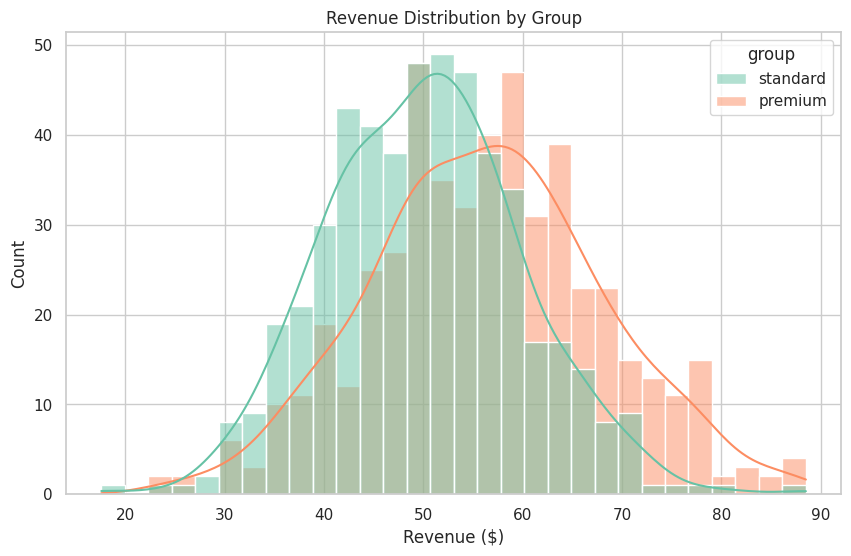

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=ab_data, x='revenue', hue='group', kde=True, bins=30, palette='Set2')
plt.title("Revenue Distribution by Group")
plt.xlabel("Revenue ($)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [ ]:
rev_control = ab_data[ab_data['group'] == 'standard']['revenue']
rev_treatment = ab_data[ab_data['group'] == 'premium']['revenue']

In [ ]:
print("Shapiro-Wilk Test (Normality):")
print(f"Standard: p = {stats.shapiro(rev_control).pvalue:.4f}")
print(f"Premium:  p = {stats.shapiro(rev_treatment).pvalue:.4f}")


print("\nLevene’s Test (Equal Variance):")
print(f"p = {stats.levene(rev_control, rev_treatment).pvalue:.4f}")

Shapiro-Wilk Test (Normality):
Standard: p = 0.4013
Premium:  p = 0.6757

Levene’s Test (Equal Variance):
p = 0.0002


In [ ]:
t_stat, p_val = stats.ttest_ind(rev_treatment, rev_control, alternative='greater')
print(f"\nT-Test Results:\nT-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")


T-Test Results:
T-statistic = 9.23, p-value = 0.0000


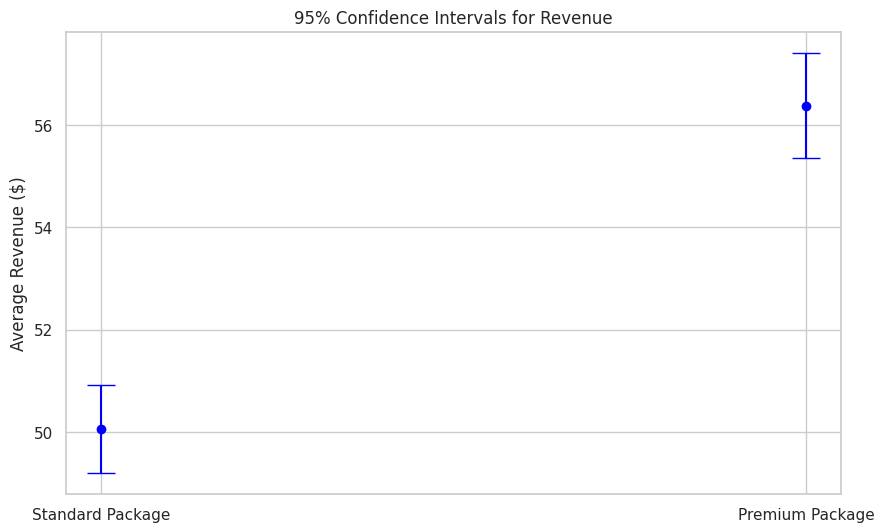

In [ ]:
mean_control = np.mean(rev_control)
mean_treatment = np.mean(rev_treatment)
sem_control = stats.sem(rev_control)
sem_treatment = stats.sem(rev_treatment)

ci_control = stats.t.interval(0.95, len(rev_control)-1, loc=mean_control, scale=sem_control)
ci_treatment = stats.t.interval(0.95, len(rev_treatment)-1, loc=mean_treatment, scale=sem_treatment)

plt.figure(figsize=(10,6))
plt.errorbar([0, 1], [mean_control, mean_treatment],
             yerr=[mean_control - ci_control[0], mean_treatment - ci_treatment[0]],
             fmt='o', capsize=10, color='blue')
plt.xticks([0, 1], ['Standard Package', 'Premium Package'])
plt.ylabel('Average Revenue ($)')
plt.title('95% Confidence Intervals for Revenue')
plt.grid(True)
plt.show()

In [ ]:
if p_val < 0.05:
    print("✅ Reject H₀: Premium pricing significantly increases revenue.")
else:
    print("❌ Fail to Reject H₀: No significant uplift from premium pricing.")

✅ Reject H₀: Premium pricing significantly increases revenue.


In [ ]:
from statsmodels.stats.power import TTestIndPower

analysis = TTestIndPower()
effect_size = (mean_treatment - mean_control) / np.std(ab_data['revenue'])
required_n = analysis.solve_power(effect_size=effect_size, power=0.8, alpha=0.05)
print(f"📊 Required sample size per group: {int(required_n)}")

📊 Required sample size per group: 50
